<a href="https://colab.research.google.com/github/asrask65/INSE-6220/blob/master/Asra%20Saeed%20-%20Final%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pycaret==2.3.6

     |████████████████████████████████| 301 kB 8.2 MB/s 
     |████████████████████████████████| 116 kB 31.3 MB/s 
     |████████████████████████████████| 6.8 MB 8.3 MB/s 
     |████████████████████████████████| 2.0 MB 57.7 MB/s 
     |████████████████████████████████| 167 kB 64.6 MB/s 
     |████████████████████████████████| 1.7 MB 61.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 56 kB 4.5 MB/s 
     |████████████████████████████████| 16.8 MB 402 kB/s 
     |████████████████████████████████| 88 kB 5.9 MB/s 
     |████████████████████████████████| 1.3 MB 60.5 MB/s 
     |████████████████████████████████| 261 kB 84.5 MB/s 
     |████████████████████████████████| 303 kB 76.4 MB/s 
     |████████████████████████████████| 636 kB 71.5 MB/s 
     |████████████████████████████████| 3.1 MB 73.7 MB/s 
     |███████████████████

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [4]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.3.5
Seaborn version:  0.11.2


**Dataset**

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/asrask65/INSE-6220/master/Abalone-11.csv')
df.head(25)

class  Length   Diameter   Height   Whole weigh  Shucked weight  Rings
0     Male     0.46       0.37     0.10         0.51            0.22     15
1     Male     0.35       0.27     0.09         0.23            0.10      7
2   Female     0.53       0.42     0.14         0.68            0.26      9
3     Male     0.44       0.37     0.13         0.52            0.22     10
4   Infant     0.33       0.26     0.08         0.21            0.09      7
5   Infant     0.43       0.30     0.10         0.35            0.14      8
6   Female     0.53       0.42     0.15         0.78            0.24     20
7   Female     0.55       0.43     0.13         0.77            0.29     16
8     Male     0.48       0.37     0.13         0.51            0.22      9
9   Female     0.55       0.44     0.15         0.89            0.31     19
10  Female     0.53       0.38     0.14         0.61            0.19     14
11    Male     0.43       0.35     0.11         0.41            0.17     10
12    Male     0.49       0.38     0.14         0.54            0.22     11
13  Female     0.54       0.41     0.15         0.68            0.27     10
14  Female     0.47       0.36     0.10         0.48            0.17     10
15    Male     0.50       0.40     0.13         0.66            0.26     12
16  Infant     0.36       0.28     0.09         0.29            0.10      7
17  Female     0.44       0.34     0.10         0.45            0.19     10
18    Male     0.37       0.30     0.08         0.26            0.10      7
19    Male     0.45       0.32     0.10         0.38            0.17      9
20    Male     0.36       0.28     0.10         0.25            0.10     11
21  Infant     0.38       0.28     0.10         0.23            0.08     10
22  Female     0.57       0.44     0.16         0.94            0.43     12
23  Female     0.55       0.42     0.14         0.76            0.32      9
24  Female     0.62       0.48     0.17         1.16            0.51     10

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   class           113 non-null    object 
 1   Length          113 non-null    float64
 2   Diameter        113 non-null    float64
 3   Height          113 non-null    float64
 4   Whole weigh     113 non-null    float64
 5   Shucked weight  113 non-null    float64
 6   Rings           113 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 6.3+ KB


In [12]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [13]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


**Exploratory Data Analysis**

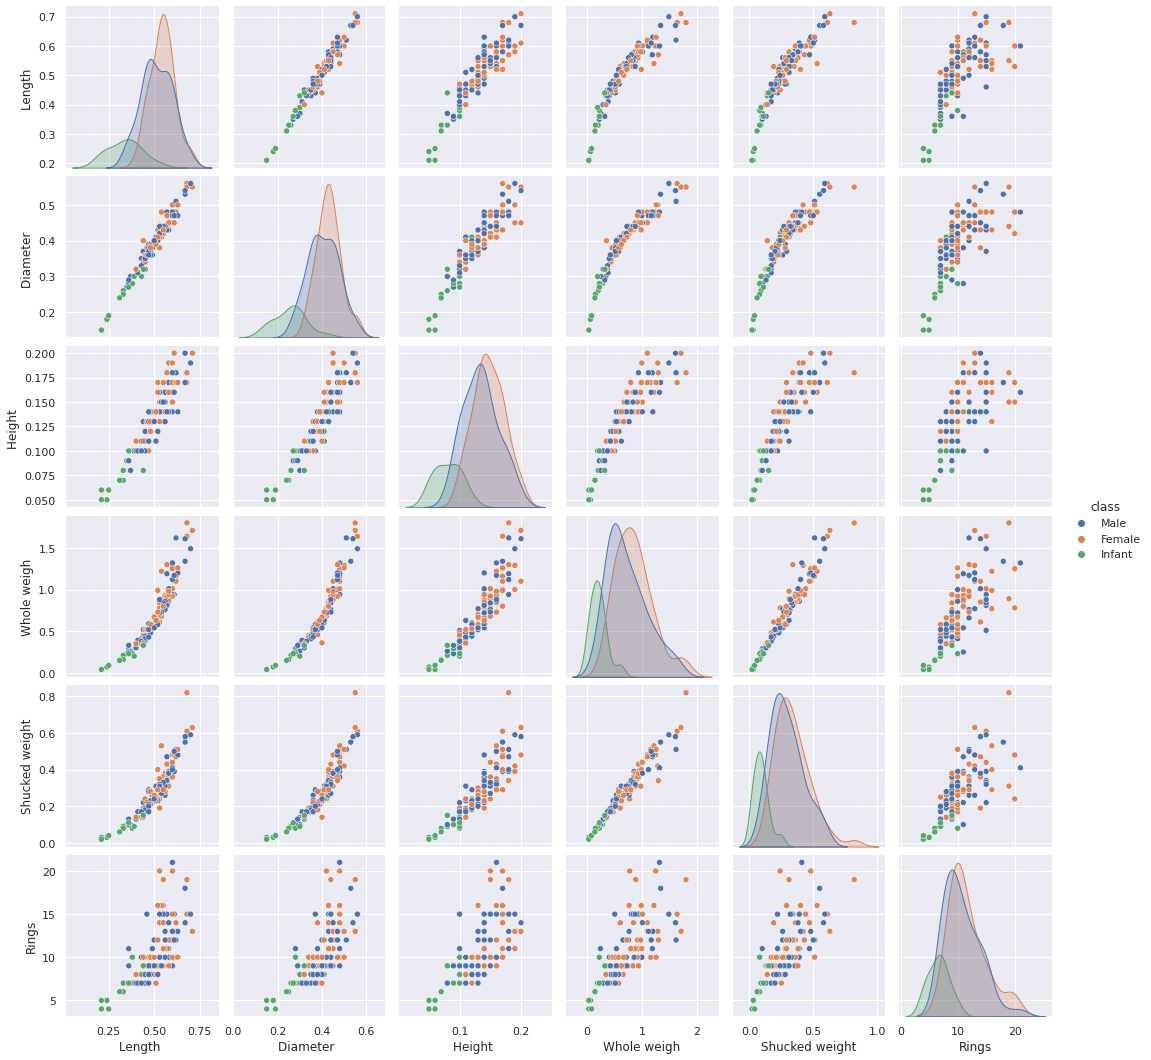

In [14]:
sns.pairplot(df, hue='class')
plt.show()

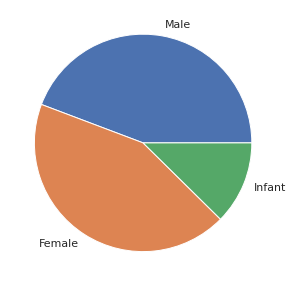

In [15]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [16]:
X = df.drop(columns=['class'])
X.head(10)

Length   Diameter   Height   Whole weigh  Shucked weight  Rings
0     0.46       0.37     0.10         0.51            0.22     15
1     0.35       0.27     0.09         0.23            0.10      7
2     0.53       0.42     0.14         0.68            0.26      9
3     0.44       0.37     0.13         0.52            0.22     10
4     0.33       0.26     0.08         0.21            0.09      7
5     0.43       0.30     0.10         0.35            0.14      8
6     0.53       0.42     0.15         0.78            0.24     20
7     0.55       0.43     0.13         0.77            0.29     16
8     0.48       0.37     0.13         0.51            0.22      9
9     0.55       0.44     0.15         0.89            0.31     19

In [17]:
X.describe().transpose()

count       mean       std   min   25%    50%    75%    max
Length          113.0   0.505841  0.100425  0.21  0.45   0.52   0.58   0.71
Diameter        113.0   0.397257  0.082929  0.15  0.36   0.41   0.45   0.56
Height          113.0   0.133451  0.033402  0.05  0.11   0.14   0.16   0.20
Whole weigh     113.0   0.720619  0.384910  0.04  0.45   0.67   0.94   1.80
Shucked weight  113.0   0.286991  0.146695  0.02  0.19   0.27   0.38   0.82
Rings           113.0  10.646018  3.438024  4.00  8.00  10.00  12.00  21.00

**Standardize the Data**

In [18]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

Length   Diameter    Height   Whole weigh  Shucked weight     Rings
0 -0.458499  -0.330138 -1.005953    -0.549629       -0.458704  1.272061
1 -1.558721  -1.541359 -1.306674    -1.280311       -1.280371 -1.065222
2  0.241642   0.275472  0.196933    -0.106000       -0.184815 -0.480901
3 -0.658540  -0.330138 -0.103789    -0.523533       -0.458704 -0.188741
4 -1.758761  -1.662482 -1.607395    -1.332503       -1.348843 -1.065222
5 -0.758560  -1.177993 -1.005953    -0.967162       -1.006482 -0.773062
6  0.241642   0.275472  0.497654     0.154958       -0.321759  2.732863
7  0.441682   0.396595 -0.103789     0.128862        0.020602  1.564222
8 -0.258459  -0.330138 -0.103789    -0.549629       -0.458704 -0.480901
9  0.441682   0.517717  0.497654     0.442012        0.157547  2.440703

In [19]:
X.describe().transpose()

count          mean       std       min       25%       50%  \
Length          113.0 -2.161496e-16  1.004454 -2.959003 -0.558520  0.141621   
Diameter        113.0  1.542522e-16  1.004454 -2.994825 -0.451260  0.154350   
Height          113.0  3.438744e-16  1.004454 -2.509559 -0.705231  0.196933   
Whole weigh     113.0  1.021798e-16  1.004454 -1.776132 -0.706203 -0.132096   
Shucked weight  113.0  1.011973e-16  1.004454 -1.828149 -0.664120 -0.116342   
Rings           113.0  1.306723e-16  1.004454 -1.941703 -0.773062 -0.188741   

                     75%       max  
Length          0.741742  2.042004  
Diameter        0.638839  1.971182  
Height          0.798375  2.001260  
Whole weigh     0.572491  2.816731  
Shucked weight  0.636853  3.649633  
Rings           0.395580  3.025024

**Observations and variables**

In [20]:
observations = list(df.index)
variables = list(df.columns)

**Box and Whisker Plots**

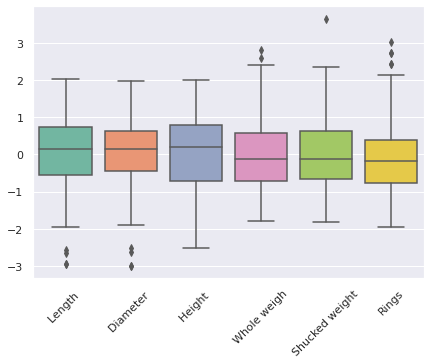

In [21]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

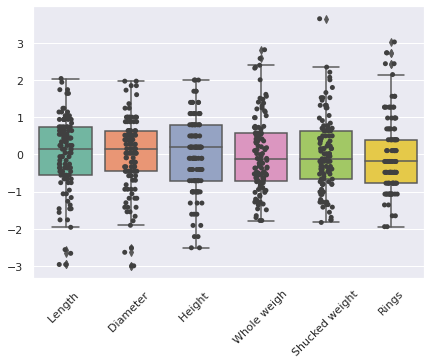

In [22]:
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

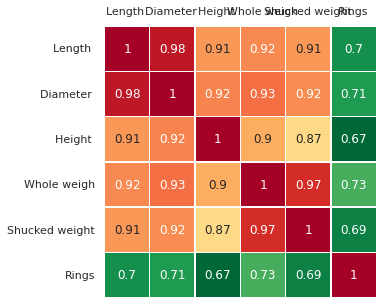

In [23]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

## **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

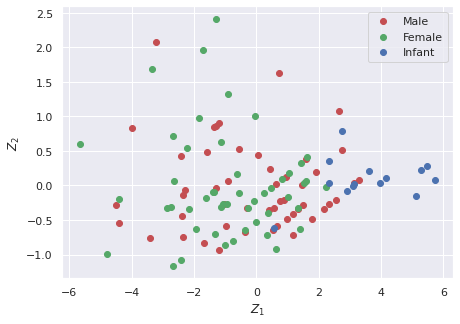

In [24]:
# Principal Component Analysis (PCA)
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_4 = np.where(y == 'Male')
idx_5 = np.where(y == 'Female')
idx_6 = np.where(y == 'Infant')


plt. figure()
plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='Male')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='Female')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='Infant')

plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

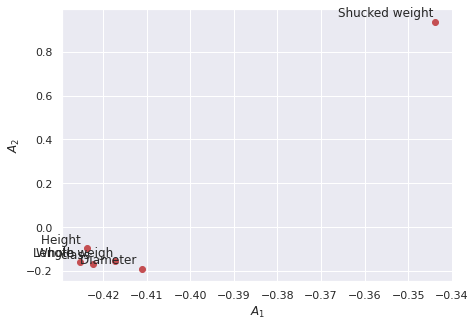

In [25]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


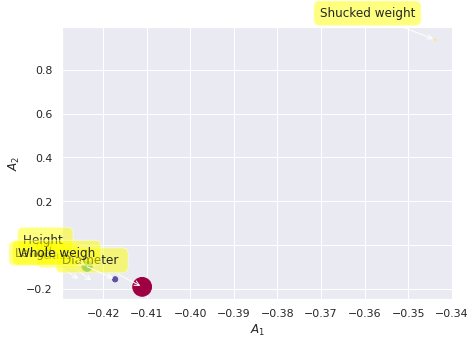

In [26]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

Text(0, 0.5, 'Explained variance')

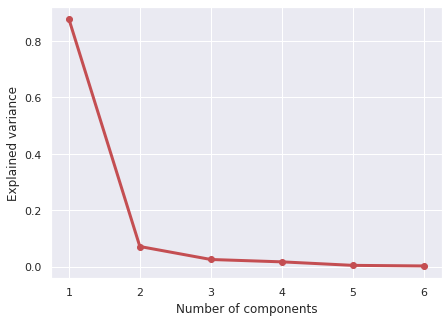

In [27]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

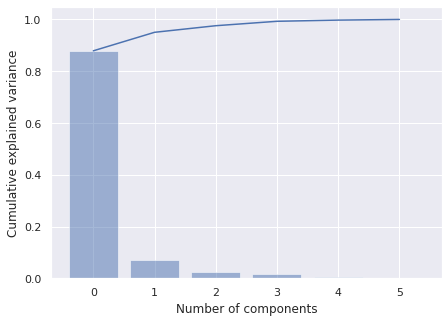

In [28]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

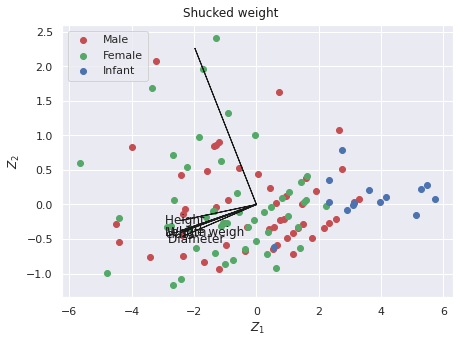

In [29]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_4,0], Z[idx_4,1], c='r', label='Male')
plt.scatter(Z[idx_5,0], Z[idx_5,1], c='g', label='Female')
plt.scatter(Z[idx_6,0], Z[idx_6,1], c='b', label='Infant')

plt.legend(loc='upper left')

## **Using PCA Library**

In [30]:
!pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=2284dbd21936ef75f02faa4a2fa237af03f613971c2858b753a53b66e6f8c8a4
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [6] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


**Principal Components**

In [32]:
out['PC']

PC1       PC2
0    0.734418  1.636308
1    3.293835  0.078504
2   -0.012789 -0.532798
3    0.939283  0.127280
4    3.604122  0.204077
..        ...       ...
108  0.367219 -0.397306
109  1.537872  0.036453
110  0.552494 -0.330517
111  1.454089  0.013200
112  2.325389  0.358254

[113 rows x 2 columns]

**Scatter plot**

(<Figure size 1440x1080 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23ca012510>)

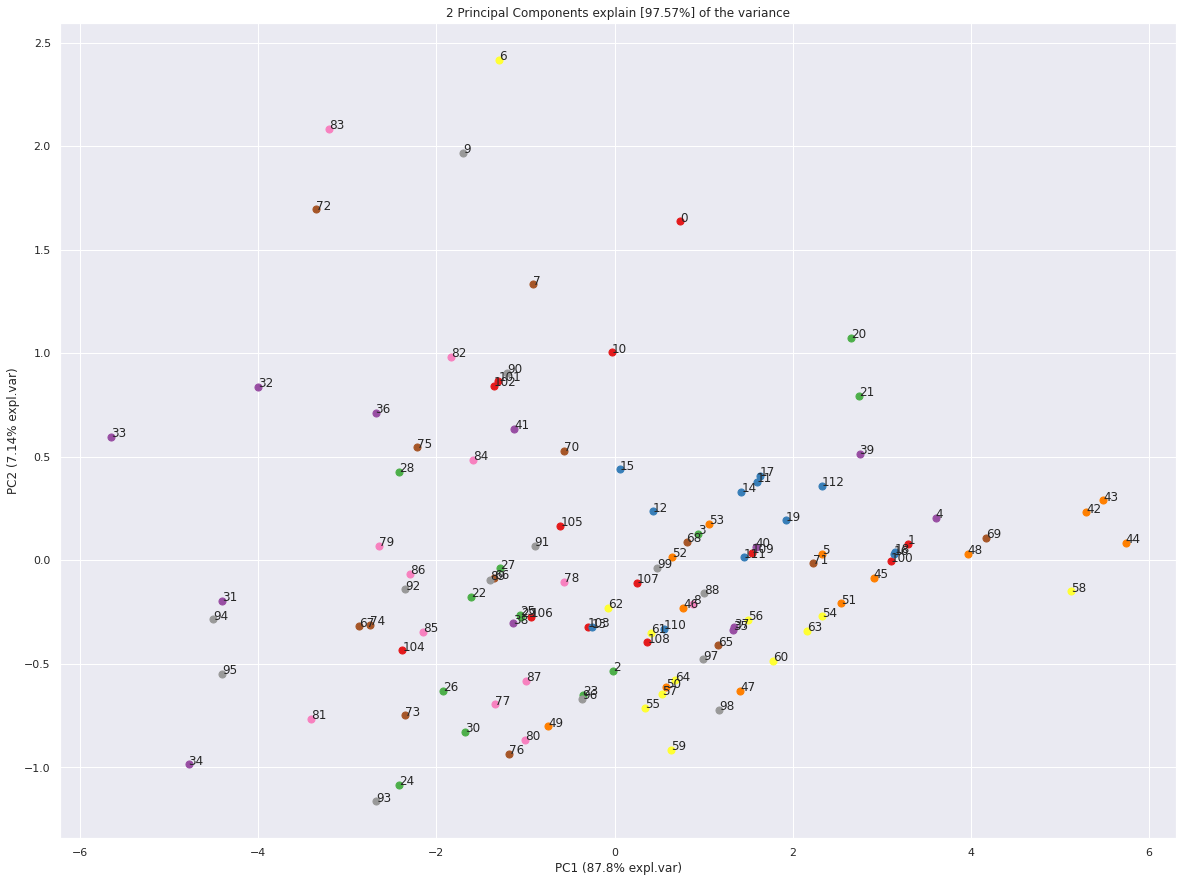

In [33]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [34]:
A = out['loadings'].T

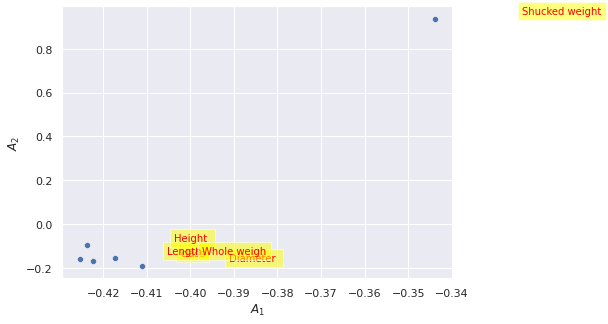

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

**Scree Plot**

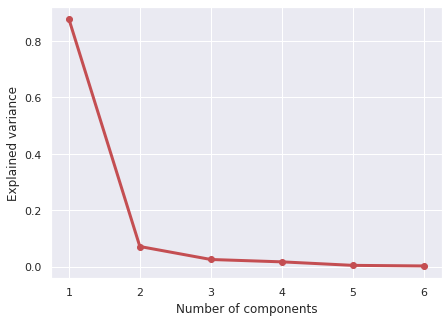

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

**Explained Variance Plot**

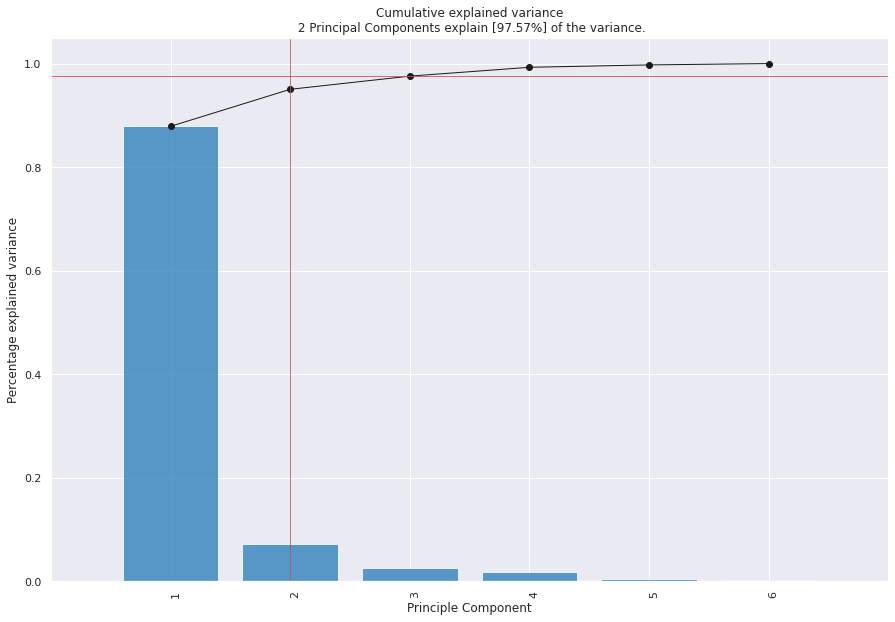

<Figure size 504x360 with 0 Axes>

In [37]:
model.plot();

**Biplot**

[pca] >Plot PC1 vs PC2 with loadings.


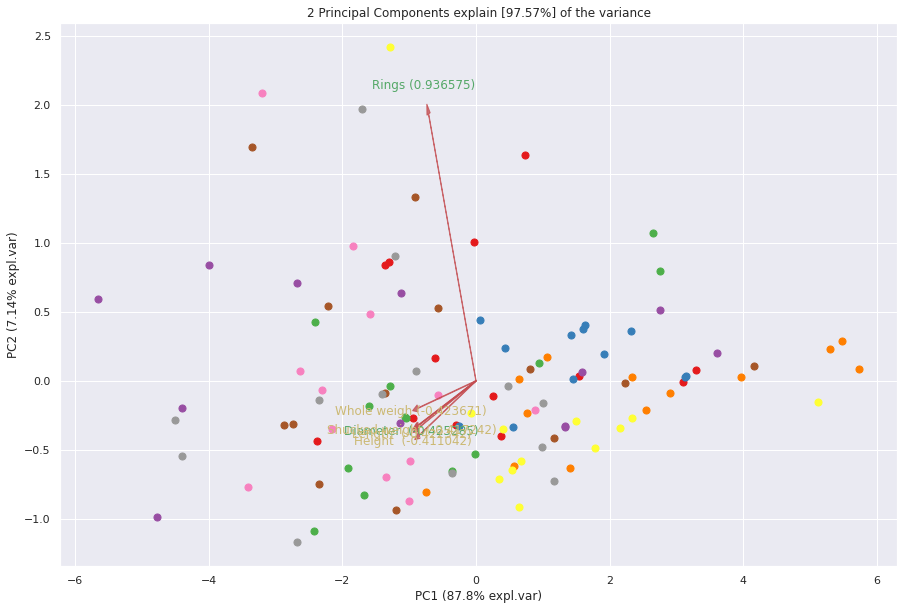

(<Figure size 1080x720 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f23c2c4fa10>)

In [38]:
model.biplot(label=False, legend=False)

In [39]:
model.biplot3d(legend=False)

[pca] >Requires 3 PCs to make 3d plot. Try to use biplot() instead.


(None, None)

## **Classification**

**Using PyCaret**

In [40]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (102, 7)
Unseen Data For Predictions: (11, 7)


**Setting up the Environment in PyCaret**

In [43]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

Description                          Value
0                               session_id                            123
1                                   Target                          class
2                              Target Type                     Multiclass
3                            Label Encoded  Female: 0, Infant: 1, Male: 2
4                            Original Data                       (102, 7)
5                           Missing Values                          False
6                         Numeric Features                              5
7                     Categorical Features                              1
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                       (71, 20)
12                    Transformed Test Set                       (31, 20)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           99de
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                          False
30                        Normalize Method                           None
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                          False
34                              PCA Method                           None
35                          PCA Components                           None
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                          False
41                      Outliers Threshold                           None
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

**Comparing All Models**

In [44]:
best_model = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.6018  0.7211  0.6000  0.5895   
knn                K Neighbors Classifier    0.5607  0.6642  0.5944  0.5823   
lda          Linear Discriminant Analysis    0.5607  0.6759  0.5889  0.5343   
et                 Extra Trees Classifier    0.5464  0.6357  0.5556  0.5587   
ridge                    Ridge Classifier    0.5446  0.0000  0.5333  0.5174   
lightgbm  Light Gradient Boosting Machine    0.5357  0.6224  0.6056  0.5357   
svm                   SVM - Linear Kernel    0.5179  0.0000  0.5333  0.4256   
rf               Random Forest Classifier    0.5054  0.6274  0.5667  0.4777   
dt               Decision Tree Classifier    0.4625  0.5550  0.5000  0.4361   
ada                  Ada Boost Classifier    0.4625  0.5838  0.3778  0.3535   
gbc          Gradient Boosting Classifier    0.4482  0.5694  0.5000  0.4206   
qda       Quadratic Discriminant Analysis    0.4089  0.0000  0.3333  0.1692   
dummy                    Dummy Classifier    0.4089  0.5000  0.3333  0.1692   
nb                            Naive Bayes    0.4071  0.6830  0.4944  0.3892   

              F1   Kappa     MCC  TT (Sec)  
lr        0.5632  0.3324  0.3512     0.335  
knn       0.5458  0.2778  0.2961     0.115  
lda       0.5323  0.2821  0.2888     0.013  
et        0.5194  0.2524  0.2642     0.404  
ridge     0.5077  0.2492  0.2567     0.011  
lightgbm  0.5041  0.2566  0.2932     0.056  
svm       0.4540  0.1988  0.2431     0.059  
rf        0.4744  0.1919  0.2021     0.453  
dt        0.4171  0.1291  0.1483     0.013  
ada       0.3892  0.0871  0.0932     0.071  
gbc       0.4147  0.0977  0.1001     0.162  
qda       0.2389  0.0000  0.0000     0.012  
dummy     0.2389  0.0000  0.0000     0.010  
nb        0.3522  0.1432  0.1716     0.013

In [45]:
best_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Create Decision Tree Classifier**

In [46]:
dt = create_model('dt')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.7333  0.6667  0.4062  0.4881  0.4545  0.5455
1       0.4286  0.5833  0.5556  0.6190  0.4286  0.1765  0.2000
2       0.4286  0.5000  0.5556  0.3143  0.3571  0.0667  0.0778
3       0.4286  0.5000  0.3333  0.3857  0.3857  0.0000  0.0000
4       0.4286  0.5000  0.3333  0.3857  0.3857  0.0000  0.0000
5       0.7143  0.7917  0.7778  0.8214  0.6769  0.5625  0.6211
6       0.2857  0.3750  0.4444  0.2500  0.2653 -0.1667 -0.1725
7       0.2857  0.3750  0.2222  0.2500  0.2653 -0.2500 -0.2609
8       0.4286  0.5417  0.5556  0.2857  0.3401  0.1250  0.1380
9       0.5714  0.6500  0.5556  0.6429  0.5782  0.3226  0.3341
Mean    0.4625  0.5550  0.5000  0.4361  0.4171  0.1291  0.1483
SD      0.1304  0.1310  0.1591  0.1837  0.1250  0.2453  0.2716

In [47]:
#trained model object is stored in the variable 'dt'. 
dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Tune Decision Tree Model**

In [48]:
tuned_dt = tune_model(dt)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.8021  0.6111  0.5938  0.5964  0.4286  0.4392
1       0.5714  0.5417  0.4444  0.4714  0.4929  0.2500  0.2858
2       0.4286  0.6607  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.4286  0.3810  0.3333  0.2143  0.2857  0.0000  0.0000
4       0.5714  0.7560  0.6667  0.7143  0.5544  0.3438  0.3795
5       0.7143  0.5893  0.7778  0.8286  0.6786  0.5333  0.6228
6       0.5714  0.7321  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.7143  0.7143  0.7778  0.8286  0.6786  0.5333  0.6228
8       0.5714  0.6964  0.6667  0.5714  0.5592  0.3000  0.3105
9       0.5714  0.7214  0.5000  0.4000  0.4643  0.3000  0.3558
Mean    0.5768  0.6595  0.6000  0.5622  0.5298  0.3056  0.3394
SD      0.0918  0.1181  0.1356  0.1843  0.1125  0.1655  0.1915

In [49]:
#tuned model object is stored in the variable 'tuned_dt'. 
tuned_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=16, max_features='log2', max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

**Evaluate Decision Tree Model**

In [50]:
!pip install statsmodels --upgrade

     |████████████████████████████████| 9.8 MB 14.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [51]:
evaluate_model(tuned_dt)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create K Neighbors Model**

In [52]:
knn = create_model('knn')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.9646  0.7778  0.8229  0.7089  0.6279  0.6758
1       0.2857  0.3810  0.2222  0.2857  0.2857 -0.1667 -0.1667
2       0.5714  0.6250  0.6667  0.5714  0.5592  0.3000  0.3105
3       0.2857  0.4464  0.2222  0.2500  0.2653 -0.2500 -0.2609
4       0.8571  0.9107  0.8889  0.8929  0.8531  0.7667  0.7936
5       0.7143  0.8571  0.7778  0.7143  0.7143  0.5333  0.5333
6       0.5714  0.7143  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.4286  0.5000  0.5556  0.4286  0.4286  0.0667  0.0667
8       0.7143  0.8929  0.7778  0.8286  0.6786  0.5333  0.6228
9       0.4286  0.3500  0.3889  0.4571  0.4048  0.0667  0.0754
Mean    0.5607  0.6642  0.5944  0.5823  0.5458  0.2778  0.2961
SD      0.1890  0.2231  0.2278  0.2169  0.1864  0.3253  0.3436

**Tune K Neighbors Model**

In [53]:
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(0,50,1)})

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.7167  0.5556  0.3542  0.4143  0.2558  0.2753
1       0.5714  0.6250  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.4286  0.6250  0.5556  0.4286  0.4286  0.0667  0.0667
3       0.4286  0.8214  0.3333  0.2143  0.2857  0.0000  0.0000
4       0.7143  0.6250  0.7778  0.7143  0.7143  0.5333  0.5333
5       0.8571  0.9643  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.7143  0.7321  0.7778  0.8286  0.6786  0.5333  0.6228
7       0.5714  0.7321  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.5714  0.7500  0.6667  0.5714  0.5592  0.3000  0.3105
9       0.2857  0.5500  0.2778  0.3929  0.3129 -0.1290 -0.1336
Mean    0.5643  0.7142  0.6167  0.5540  0.5365  0.2927  0.3090
SD      0.1580  0.1126  0.1833  0.2034  0.1712  0.2562  0.2711

**Evaluate K Neighbors Model**

In [54]:
evaluate_model(tuned_knn)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Logistic Regression Model**

In [55]:
lr = create_model('lr')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.9750  0.8889  0.9167  0.8750  0.8140  0.8333
1       0.2857  0.3929  0.2222  0.1714  0.2143 -0.2500 -0.2858
2       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
3       0.7143  0.8214  0.5556  0.6071  0.6531  0.5000  0.5217
4       0.7143  0.8929  0.5556  0.6857  0.6643  0.5000  0.5715
5       0.7143  0.9286  0.7778  0.8286  0.6786  0.5333  0.6228
6       0.5714  0.6429  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.5714  0.4286  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.7143  0.8571  0.7778  0.8286  0.6786  0.5333  0.6228
9       0.2857  0.5929  0.2222  0.1429  0.1905 -0.2069 -0.3062
Mean    0.6018  0.7211  0.6000  0.5895  0.5632  0.3324  0.3512
SD      0.1811  0.1958  0.2120  0.2462  0.2007  0.3165  0.3606

**Tune Logistic Regression Model**

In [56]:
tuned_lr = tune_model(lr)


Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.9750  0.8889  0.9167  0.8750  0.8140  0.8333
1       0.2857  0.3929  0.2222  0.2143  0.2449 -0.1667 -0.1725
2       0.5714  0.7500  0.6667  0.5714  0.5592  0.3000  0.3105
3       0.5714  0.8571  0.4444  0.5000  0.5306  0.2500  0.2609
4       0.7143  0.8929  0.7778  0.7143  0.7143  0.5333  0.5333
5       0.8571  0.9643  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.5714  0.7143  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.5714  0.4286  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.7143  0.8571  0.7778  0.8286  0.6786  0.5333  0.6228
9       0.4286  0.5571  0.3889  0.4571  0.4048  0.0667  0.0754
Mean    0.6161  0.7389  0.6389  0.6238  0.5979  0.3697  0.3878
SD      0.1723  0.2020  0.2097  0.2067  0.1825  0.2858  0.2975

**Evaluate Logistic Regression Model**

In [57]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

**Create Random Forest Model**

In [58]:
rf = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.6250  0.7333  0.6667  0.3917  0.4812  0.4419  0.5353
1       0.5714  0.6964  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.2857  0.5714  0.4444  0.2500  0.2653 -0.1667 -0.1725
3       0.1429  0.3750  0.1111  0.1071  0.1224 -0.5000 -0.5217
4       0.5714  0.5476  0.6667  0.7143  0.5544  0.3438  0.3795
5       1.0000  1.0000  1.0000  1.0000  1.0000  1.0000  1.0000
6       0.4286  0.5714  0.5556  0.4286  0.4286  0.0667  0.0667
7       0.5714  0.5357  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.5714  0.7143  0.6667  0.5714  0.5592  0.3000  0.3105
9       0.2857  0.5286  0.2222  0.1714  0.2143 -0.1667 -0.1976
Mean    0.5054  0.6274  0.5667  0.4777  0.4744  0.1919  0.2021
SD      0.2259  0.1603  0.2406  0.2545  0.2327  0.3905  0.4070

**Tune Random Forest Model**

In [59]:
tuned_rf = tune_model(rf)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.7292  0.5556  0.3167  0.3875  0.2558  0.3099
1       0.4286  0.6786  0.5556  0.3143  0.3571  0.0667  0.0778
2       0.5714  0.6786  0.6667  0.3571  0.4286  0.3000  0.4743
3       0.4286  0.6786  0.3333  0.2143  0.2857  0.0000  0.0000
4       0.4286  0.6786  0.5556  0.2857  0.3401  0.1250  0.1380
5       0.7143  0.6786  0.7778  0.8286  0.6786  0.5333  0.6228
6       0.7143  0.6786  0.7778  0.8286  0.6786  0.5333  0.6228
7       0.5714  0.6786  0.6667  0.3571  0.4286  0.3000  0.4743
8       0.7143  0.6786  0.7778  0.8286  0.6786  0.5333  0.6228
9       0.5714  0.6143  0.6111  0.8286  0.5680  0.3824  0.4900
Mean    0.5643  0.6772  0.6278  0.5160  0.4831  0.3030  0.3833
SD      0.1127  0.0258  0.1316  0.2580  0.1457  0.1863  0.2249

**Evaluate Random Forest Model**

In [60]:
evaluate_model(tuned_rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Tune the Best Model**

In [61]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model = tune_model(best_model)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.8750  0.9750  0.8889  0.9167  0.8750  0.8140  0.8333
1       0.2857  0.3929  0.2222  0.2143  0.2449 -0.1667 -0.1725
2       0.5714  0.7500  0.6667  0.5714  0.5592  0.3000  0.3105
3       0.5714  0.8571  0.4444  0.5000  0.5306  0.2500  0.2609
4       0.7143  0.8929  0.7778  0.7143  0.7143  0.5333  0.5333
5       0.8571  0.9643  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.5714  0.7143  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.5714  0.4286  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.7143  0.8571  0.7778  0.8286  0.6786  0.5333  0.6228
9       0.4286  0.5571  0.3889  0.4571  0.4048  0.0667  0.0754
Mean    0.6161  0.7389  0.6389  0.6238  0.5979  0.3697  0.3878
SD      0.1723  0.2020  0.2097  0.2067  0.1825  0.2858  0.2975

In [62]:
tuned_best_model

LogisticRegression(C=7.863, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

In [63]:
evaluate_model(tuned_best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Classification + PCA**

In [64]:
clf_pca = setup(data=data, target='class', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

Description                          Value
0                               session_id                            123
1                                   Target                          class
2                              Target Type                     Multiclass
3                            Label Encoded  Female: 0, Infant: 1, Male: 2
4                            Original Data                       (102, 7)
5                           Missing Values                          False
6                         Numeric Features                              5
7                     Categorical Features                              1
8                         Ordinal Features                          False
9                High Cardinality Features                          False
10                 High Cardinality Method                           None
11                   Transformed Train Set                        (71, 3)
12                    Transformed Test Set                        (31, 3)
13                      Shuffle Train-Test                           True
14                     Stratify Train-Test                          False
15                          Fold Generator                StratifiedKFold
16                             Fold Number                             10
17                                CPU Jobs                             -1
18                                 Use GPU                          False
19                          Log Experiment                          False
20                         Experiment Name               clf-default-name
21                                     USI                           aab6
22                         Imputation Type                         simple
23          Iterative Imputation Iteration                           None
24                         Numeric Imputer                           mean
25      Iterative Imputation Numeric Model                           None
26                     Categorical Imputer                       constant
27  Iterative Imputation Categorical Model                           None
28           Unknown Categoricals Handling                 least_frequent
29                               Normalize                           True
30                        Normalize Method                         zscore
31                          Transformation                          False
32                   Transformation Method                           None
33                                     PCA                           True
34                              PCA Method                         linear
35                          PCA Components                              3
36                     Ignore Low Variance                          False
37                     Combine Rare Levels                          False
38                    Rare Level Threshold                           None
39                         Numeric Binning                          False
40                         Remove Outliers                          False
41                      Outliers Threshold                           None
42                Remove Multicollinearity                          False
43             Multicollinearity Threshold                           None
44             Remove Perfect Collinearity                           True
45                              Clustering                          False
46                    Clustering Iteration                           None
47                     Polynomial Features                          False
48                       Polynomial Degree                           None
49                    Trignometry Features                          False
50                    Polynomial Threshold                           None
51                          Group Features                          False
52                       Feature Selection                          False
53                Feature Selection

In [65]:
#show the best model and their statistics
best_model_pca = compare_models()

Model  Accuracy     AUC  Recall   Prec.  \
lr                    Logistic Regression    0.5607  0.6737  0.6167  0.5677   
et                 Extra Trees Classifier    0.5482  0.5898  0.5889  0.5561   
qda       Quadratic Discriminant Analysis    0.5304  0.6891  0.5778  0.5440   
knn                K Neighbors Classifier    0.5196  0.6742  0.5944  0.4959   
lda          Linear Discriminant Analysis    0.4911  0.6638  0.5333  0.4859   
ridge                    Ridge Classifier    0.4893  0.0000  0.5389  0.4599   
lightgbm  Light Gradient Boosting Machine    0.4804  0.6093  0.5778  0.4713   
gbc          Gradient Boosting Classifier    0.4786  0.5793  0.5556  0.4330   
nb                            Naive Bayes    0.4768  0.6577  0.5222  0.4566   
dt               Decision Tree Classifier    0.4518  0.5392  0.5333  0.4650   
rf               Random Forest Classifier    0.4375  0.5516  0.5222  0.4320   
ada                  Ada Boost Classifier    0.4357  0.5676  0.3611  0.3200   
svm                   SVM - Linear Kernel    0.4339  0.0000  0.5000  0.3506   
dummy                    Dummy Classifier    0.4089  0.5000  0.3333  0.1692   

              F1   Kappa     MCC  TT (Sec)  
lr        0.5484  0.2918  0.2966     0.017  
et        0.5213  0.2621  0.2823     0.403  
qda       0.5141  0.2410  0.2518     0.012  
knn       0.4955  0.2213  0.2278     0.118  
lda       0.4738  0.1629  0.1524     0.013  
ridge     0.4584  0.1697  0.1606     0.010  
lightgbm  0.4485  0.1699  0.1882     0.028  
gbc       0.4347  0.1607  0.1909     0.153  
nb        0.4515  0.1387  0.1281     0.013  
dt        0.4336  0.1224  0.1369     0.012  
rf        0.4178  0.0853  0.0890     0.453  
ada       0.3486  0.0500  0.0779     0.072  
svm       0.3642  0.1096  0.1392     0.062  
dummy     0.2389  0.0000  0.0000     0.010

In [66]:
best_model_pca

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Tune the Best Model**

In [67]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.7500  0.8542  0.7778  0.7917  0.7500  0.6279  0.6429
1       0.5714  0.5476  0.6667  0.5714  0.5524  0.3438  0.3550
2       0.2857  0.5357  0.4444  0.2500  0.2653 -0.1667 -0.1725
3       0.4286  0.5357  0.5556  0.3143  0.3571  0.0667  0.0778
4       0.4286  0.5357  0.5556  0.4286  0.4095  0.1250  0.1291
5       0.8571  0.7857  0.8889  0.8929  0.8531  0.7667  0.7936
6       0.7143  0.7857  0.7778  0.7143  0.7143  0.5333  0.5333
7       0.5714  0.6071  0.6667  0.5714  0.5592  0.3000  0.3105
8       0.8571  0.9286  0.8889  0.8929  0.8531  0.7667  0.7936
9       0.2857  0.5857  0.2778  0.3929  0.3129 -0.1290 -0.1336
Mean    0.5750  0.6702  0.6500  0.5820  0.5627  0.3234  0.3330
SD      0.2048  0.1441  0.1860  0.2227  0.2106  0.3288  0.3378

In [68]:
tuned_best_model_pca

LogisticRegression(C=3.882, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate the Best Model**

In [69]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

## **Explainable AI with Shapley values**

In [70]:
!pip install shap

     |████████████████████████████████| 564 kB 13.8 MB/s 


In [71]:
import shap

In [72]:

rf_pca = create_model('rf')

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.3750  0.5458  0.4444  0.2917  0.3250  0.0698  0.0714
1       0.4286  0.6071  0.5556  0.3143  0.3571  0.0667  0.0778
2       0.2857  0.3571  0.4444  0.2500  0.2653 -0.1667 -0.1725
3       0.0000  0.0952  0.0000  0.0000  0.0000 -0.7500 -0.7826
4       0.5714  0.8214  0.6667  0.7143  0.5544  0.3438  0.3795
5       0.5714  0.6071  0.6667  0.5714  0.5592  0.3000  0.3105
6       0.5714  0.6786  0.6667  0.5714  0.5592  0.3000  0.3105
7       0.2857  0.4286  0.4444  0.2500  0.2653 -0.1667 -0.1725
8       0.7143  0.7500  0.7778  0.7143  0.7143  0.5333  0.5333
9       0.5714  0.6250  0.5556  0.6429  0.5782  0.3226  0.3341
Mean    0.4375  0.5516  0.5222  0.4320  0.4178  0.0853  0.0890
SD      0.1974  0.2003  0.2052  0.2300  0.2014  0.3523  0.3656

In [73]:
tuned_rf_pca = tune_model(rf_pca)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
0       0.5000  0.6583  0.5556  0.4792  0.4750  0.2558  0.2619
1       0.5714  0.5714  0.6667  0.5714  0.5592  0.3000  0.3105
2       0.2857  0.4643  0.4444  0.2500  0.2653 -0.1667 -0.1725
3       0.1429  0.1905  0.1111  0.1071  0.1224 -0.5000 -0.5217
4       0.8571  0.8571  0.8889  0.9286  0.8667  0.7812  0.8069
5       0.5714  0.5000  0.6667  0.5714  0.5592  0.3000  0.3105
6       0.7143  0.8214  0.7778  0.8286  0.6786  0.5333  0.6228
7       0.5714  0.6786  0.6667  0.7143  0.5544  0.3438  0.3795
8       0.8571  0.8929  0.8889  0.8929  0.8531  0.7667  0.7936
9       0.4286  0.6571  0.4444  0.5238  0.4476  0.1250  0.1291
Mean    0.5500  0.6292  0.6111  0.5867  0.5381  0.2739  0.2921
SD      0.2168  0.2005  0.2236  0.2539  0.2208  0.3727  0.3924

**SHAP Summary Plot**

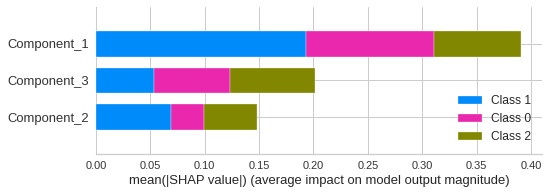

In [74]:
interpret_model(tuned_rf_pca, plot='summary')

In [75]:
#explainer = shap.TreeExplainer(tuned_rf_pca)
#X = df.drop('class', axis=1)
#shap_values = explainer.shap_values(X)
#shap.summary_plot(shap_values, X)

**Visualize a single prediction**

In [76]:
interpret_model(tuned_rf_pca, plot='reason', observation=24)

**Visualize many predictions**

In [77]:
interpret_model(tuned_rf_pca, plot='reason')